In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


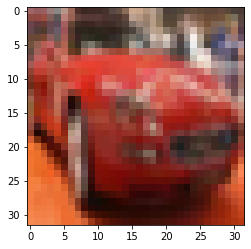

In [4]:
plt.imshow(x_train[5], cmap='gray')

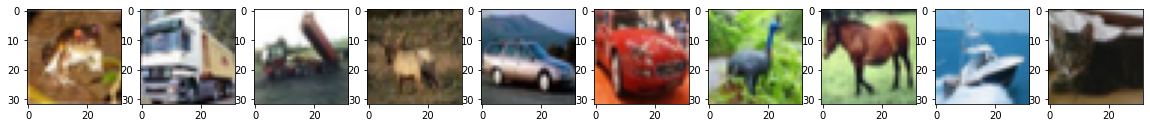

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:10], x_test[0:10])) :
    plt.subplot(1 , 10 , index + 1)
    plt.imshow(np.reshape(image, (32,32,3)), cmap='gray')

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
set(y_train[5])

{1}

In [0]:
x_train = x_train/255
x_test = x_test/255

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

Using TensorFlow backend.


In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
__________________________________________________

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
X = model.fit(x_train,y_train,batch_size=200,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
250/250 [==============================] - 2s 7ms/step - loss: 1.6768 - accuracy: 0.4006 - val_loss: 1.3788 - val_accuracy: 0.5153
Epoch 2/20
250/250 [==============================] - 1s 6ms/step - loss: 1.3630 - accuracy: 0.5138 - val_loss: 1.2487 - val_accuracy: 0.5589
Epoch 3/20
250/250 [==============================] - 1s 6ms/step - loss: 1.2519 - accuracy: 0.5560 - val_loss: 1.1846 - val_accuracy: 0.5789
Epoch 4/20
250/250 [==============================] - 1s 6ms/step - loss: 1.1733 - accuracy: 0.5855 - val_loss: 1.1467 - val_accuracy: 0.5949
Epoch 5/20
250/250 [==============================] - 1s 6ms/step - loss: 1.1099 - accuracy: 0.6061 - val_loss: 1.0845 - val_accuracy: 0.6201
Epoch 6/20
250/250 [==============================] - 1s 6ms/step - loss: 1.0571 - accuracy: 0.6275 - val_loss: 1.0607 - val_accuracy: 0.6232
Epoch 7/20
250/250 [==============================] - 1s 6ms/step - loss: 1.0073 - accuracy: 0.6462 - val_loss: 1.0584 - val_accuracy: 0.6287
Epoch 

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9952 - accuracy: 0.6614


[0.9951620101928711, 0.6614000201225281]

In [16]:
model.predict(x_test)


array([[9.7722193e-05, 1.1169313e-03, 8.4466049e-03, ..., 3.5250569e-03,
        9.8868981e-03, 1.2406531e-03],
       [3.6004672e-03, 6.0177082e-01, 5.5848037e-08, ..., 1.0783600e-09,
        3.9209992e-01, 2.5286167e-03],
       [2.0997386e-01, 3.9685253e-02, 6.8763192e-03, ..., 2.6553448e-03,
        7.1026844e-01, 2.7429808e-02],
       ...,
       [5.2512161e-05, 1.2309363e-07, 2.1860611e-01, ..., 3.1321958e-02,
        3.1696280e-05, 6.6448383e-06],
       [2.9586967e-02, 1.7293912e-01, 1.1248551e-03, ..., 5.0434046e-03,
        1.3819521e-03, 2.3763136e-05],
       [8.1026741e-07, 3.6214189e-07, 1.8805522e-03, ..., 8.2535964e-01,
        1.5912930e-07, 2.0655320e-06]], dtype=float32)

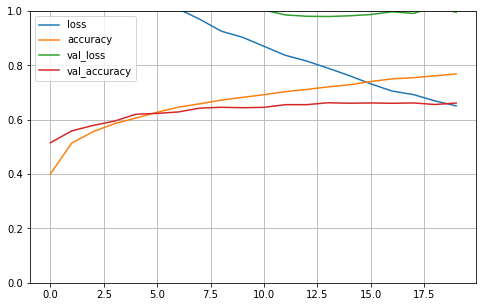

In [17]:
import pandas as pd

pd.DataFrame(X.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()